# Importando bibliotecas

# TECH Challenge
# Enunciado
Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.
Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:
1. País de origem (Brasil).
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01
Seu objetivo é dizer o **montante de venda de exportação nos últimos 15 anos**, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. 


Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import seaborn as sb
from datetime import date
import matplotlib.ticker as ticker
import matplotlib
import my_functions as my

In [2]:
colors_dict = {
    'dark wine':'#38001a',
    'medium wine':'#A10028',
    'bright wine':'#D73D00',
    'olive yellow':'#cf9800',
    'olive green':'#918700',
    'brown':'#974d1c',
    'neon green':'#84dc00',
    'neon cyan':'#00cbb7',
    'neon blue':'#a00500',
    'dark red':'#ff3f3f',
    'neon red':'#817700',
}

colors_main = [list(colors_dict.values())[i] for i in range(0,6)]
colors_accent = [list(colors_dict.values())[i] for i in range(6,len(colors_dict))]
colors_rotation = ['#520026',
                   # '#A10028',
                   '#C64B1B',
                   # '#E37F0E',
                   '#FFB300',
                   '#BA8600',
                   '#887f00',
                   '#3D4800',
                   '#79a500',
                   '#AFDF00']


cycler_main = cycler(color=colors_main)
cycler_accent = cycler(color=colors_accent)
cycler_rotation = cycler(color=colors_rotation)

my.set_axes_cycler(cycler_main)
# plt.rc('axes', prop_cycle=cycler_main)

In [50]:
line_width = 3
size = (10,6)
size_stretch = (6,10)
size_squash = (18,4)

# Processing

In [4]:
df_exports = pd.read_csv('./extraidos_final/ALL_exports.csv', index_col=0)
df_population = pd.read_csv('./extraidos_final/countries_population.csv', index_col=0)

In [5]:
export_type = df_exports['tipo'].unique()
type_color_name = {
    'Vinhos de mesa': 'dark wine',
    'Vinhos espumantes':'medium wine',
    'Suco de uva':'olive yellow',
    'Uvas frescas':'olive green'
}

type_color = {key: colors_dict[value] for key,value in zip(type_color_name.keys(), type_color_name.values())}

In [6]:
df_exports['kg'] = df_exports['kg'].replace(0,np.nan)

In [7]:
df_exports['valor_por_kg'] = df_exports['valor'] / df_exports ['kg']

In [8]:
df_exports['ano'] = df_exports['ano'].map(lambda x : date(int(x),1, 1))

In [9]:
sorted(df_exports['pais_destino'].unique());

In [10]:
replace_dictionary = {
    'Alemanha, República Democrática':'Alemanha',
    'Alemanha, República Democrática da':'Alemanha', 
    'Australia':'Austrália',
    'Belice': 'Belize',
    'Bulgaria': 'Bulgária',
    'Bósnia': 'Bósnia-Herzegovina',
    'Canada': 'Canadá',
    'Colombia':'Colômbia',
    'Coreia do Sul, Republica da':'Coreia do Sul',
    'Coreia, Republica Sul' : 'Coreia do Sul',
    'Coveite (Kuweit)' : 'Kuweit',
    'Dominica, Ilha de':'Dominica',
    'Emirados Arabes Unidos':'Emirados Árabes Unidos',
    'Estonia':'Estônia',
    'Falkland (Ilhas Malvinas)':'Falkland (Malvinas)',
    'Filânldia':'Finlândia', 
    'Guine Equatorial':'Guiné Equatorial',
    'Guine Bissau':'Guiné Bissau',
    'Guiné-Bissau':'Guiné Bissau',
    'India':'Índia',
    'Países Baixos (Holanda)':'Países Baixos',
    'Republica Dominicana':'República Dominicana',
    'República Federativa da Rússia':'Rússia',
    'Tcheca, República':'República Tcheca',
    'Rússia,  Federação da':'Rússia',
    'Taiwan (Formosa)':'Taiwan',
    'Trinidade Tobago':'Trindade e Tobago',
    'Trinidade e Tobago':'Trindade e Tobago',
}

In [11]:
continents = {
  "Afeganistão": "Ásia",
  "Africa do Sul": "África",
  "Alemanha": "Europa",
  "Angola": "África",
  "Anguilla": "América do Norte",
  "Antigua e Barbuda": "América do Norte",
  "Antilhas Holandesas": "América do Norte",
  "Antígua e Barbuda": "América do Norte",
  "Arabia Saudita": "Ásia",
  "Argentina": "América do Sul",
  "Argélia": "África",
  "Aruba": "América do Sul",
  "Arábia Saudita": "Ásia",
  "Austrália": "Oceania",
  "Bahamas": "América do Norte",
  "Bahrein": "Ásia",
  "Bangladesh": "Ásia",
  "Barbados": "América do Norte",
  "Barein": "Ásia",
  "Belgica": "Europa",
  "Belize": "América do Norte",
  "Benin": "África",
  "Bermudas": "América do Norte",
  "Birmânia": "Ásia",
  "Bolívia": "América do Sul",
  "Brasil": "América do Sul",
  "Bulgária": "Europa",
  "Burquina Faso": "África",
  "Bélgica": "Europa",
  "Bósnia-Herzegovina": "Europa",
  "Cabo Verde": "África",
  "Camarões": "África",
  "Camores": "África",
  "Canadá": "América do Norte",
  "Catar": "Ásia",
  "Cayman, Ilhas": "América do Norte",
  "Chile": "América do Sul",
  "China": "Ásia",
  "Chipre": "Ásia",
  "Cingapura": "Ásia",
  "Cocos (Keeling), Ilhas": "Oceania",
  "Colômbia": "América do Sul",
  "Comores": "África",
  "Congo": "África",
  "Cook, Ilhas": "Oceania",
  "Coreia do Norte": "Ásia",
  "Coreia do Sul": "Ásia",
  "Costa Rica": "América do Norte",
  "Costa do Marfim": "África",
  "Coveite": "Ásia",
  "Croácia": "Europa",
  "Cuba": "América do Norte",
  "Curaçao": "América do Sul",
  "Dinamarca": "Europa",
  "Djibuti": "África",
  "Dominica": "América do Norte",
  "Egito": "África",
  "El Salvador": "América do Norte",
  "Emirados Árabes Unidos": "Ásia",
  "Equador": "América do Sul",
  "Eslovaca, Republica": "Europa",
  "Eslovênia": "Europa",
  "Espanha": "Europa",
  "Estados Unidos": "América do Norte",
  "Estônia": "Europa",
  "Falkland (Malvinas)": "América do Sul",
  "Faroé, Ilhas": "Europa",
  "Filipinas": "Ásia",
  "Finlândia": "Europa",
  "França": "Europa",
  "Gabão": "África",
  "Gana": "África",
  "Georgia": "Ásia",
  "Gibraltar": "Europa",
  "Granada": "América do Norte",
  "Grécia": "Europa",
  "Guadalupe": "América do Norte",
  "Guatemala": "América do Norte",
  "Guiana": "América do Sul",
  "Guiana Francesa": "América do Sul",
  "Guiné Bissau": "África",
  "Guiné Equatorial": "África",
  "Haiti": "América do Norte",
  "Honduras": "América do Norte",
  "Hong Kong": "Ásia",
  "Hungria": "Europa",
  "Ilha de Man": "Europa",
  "Ilhas Virgens": "América do Norte",
  "Indonésia": "Ásia",
  "Iraque": "Ásia",
  "Irlanda": "Europa",
  "Irã": "Ásia",
  "Islândia": "Europa",
  "Israel": "Ásia",
  "Itália": "Europa",
  "Iugoslâvia": "Europa",
  "Jamaica": "América do Norte",
  "Japão": "Ásia",
  "Jordânia": "Ásia",
  "Jérsei": "Europa",
  "Kuweit": "Ásia",
  "Letônia": "Europa",
  "Libéria": "África",
  "Lituânia": "Europa",
  "Luxemburgo": "Europa",
  "Líbano": "Ásia",
  "Líbia": "África",
  "Macau": "Ásia",
  "Macedônia": "Europa",
  "Malavi": "África",
  "Maldivas": "Ásia",
  "Malta": "Europa",
  "Malásia": "Ásia",
  "Marianas do Norte, Ilhas": "Oceania",
  "Marrocos": "África",
  "Marshall, Ilhas": "Oceania",
  "Martinica": "América do Norte",
  "Mauricio": "África",
  "Mauritânia": "África",
  "Mexico": "América do Norte",
  "Mongólia": "Ásia",
  "Montenegro": "Europa",
  "Moçambique": "África",
  "México": "América do Norte",
  "Mônaco": "Europa",
  "Namíbia": "África",
  "Nicarágua": "América do Norte",
  "Nigéria": "África",
  "Noruega": "Europa",
  "Nova Caledônia": "Oceania",
  "Nova Zelândia": "Oceania",
  "Omã": "Ásia",
  "Outros(1)": np.nan,
  "Palau": "Oceania",
  "Panamá": "América do Norte",
  "Paquistão": "Ásia",
  "Paraguai": "América do Sul",
  "Países Baixos": "Europa",
  "Peru": "América do Sul",
  "Pitcairn": "Oceania",
  "Polônia": "Europa",
  "Porto Rico": "América do Norte",
  "Portugal": "Europa",
  "Provisão de Navios e Aeronaves": np.nan,
  "Quirguistão": "Ásia",
  "Quênia": "África",
  "Reino Unido": "Europa",
  "Republica Tcheca": "Europa",
  "República Centro Africana": "África",
  "República Dominicana": "América do Norte",
  "República Federativa da Rússia": "Europa/Ásia",
  "Romênia": "Europa",
  "Rússia": "Europa/Ásia",
  "Samoa Americana": "Oceania",
  "Senegal": "África",
  "Serra Leoa": "África",
  "Singapura": "Ásia",
  "Sri Lanka": "Ásia",
  "Suazilândia": "África",
  "Suriname": "América do Sul",
  "Suécia": "Europa",
  "Suíça": "Europa",
  "São Cristóvão e Névis": "América do Norte",
  "São Tomé e Príncipe": "África",
  "São Vicente e Granadinas": "América do Norte",
  "Sérvia": "Europa",
  "Tailândia": "Ásia",
  "Taiwan": "Ásia",
  "Tanzânia": "África",
  "Togo": "África",
  "Toquelau": "Oceania",
  "Trindade e Tobago": "América do Norte",
  "Tunísia": "África",
  "Turcas e Caicos, ilhas": "América do Norte",
  "Turquia": "Europa/Ásia",
  "Tuvalu": "Oceania",
  "Uruguai": "América do Sul",
  "Vanuatu": "Oceania",
  "Venezuela": "América do Sul",
  "Vietnã": "Ásia",
  "Wallis e Futuna, Ilhas": "Oceania",
  "África do Sul": "África",
  "Áustria": "Europa",
  "Índia": "Ásia"
}

In [12]:
df_exports = df_exports.replace(replace_dictionary.keys(),replace_dictionary.values())
sorted(df_exports['pais_destino'].unique())

['Afeganistão',
 'Africa do Sul',
 'Alemanha',
 'Angola',
 'Anguilla',
 'Antigua e Barbuda',
 'Antilhas Holandesas',
 'Antígua e Barbuda',
 'Arabia Saudita',
 'Argentina',
 'Argélia',
 'Aruba',
 'Arábia Saudita',
 'Austrália',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbados',
 'Barein',
 'Belgica',
 'Belize',
 'Benin',
 'Bermudas',
 'Birmânia',
 'Bolívia',
 'Brasil',
 'Bulgária',
 'Burquina Faso',
 'Bélgica',
 'Bósnia-Herzegovina',
 'Cabo Verde',
 'Camarões',
 'Camores',
 'Canadá',
 'Catar',
 'Cayman, Ilhas',
 'Chile',
 'China',
 'Chipre',
 'Cingapura',
 'Cocos (Keeling), Ilhas',
 'Colômbia',
 'Comores',
 'Congo',
 'Cook, Ilhas',
 'Coreia do Norte',
 'Coreia do Sul',
 'Costa Rica',
 'Costa do Marfim',
 'Coveite',
 'Croácia',
 'Cuba',
 'Curaçao',
 'Dinamarca',
 'Djibuti',
 'Dominica',
 'Egito',
 'El Salvador',
 'Emirados Árabes Unidos',
 'Equador',
 'Eslovaca, Republica',
 'Eslovênia',
 'Espanha',
 'Estados Unidos',
 'Estônia',
 'Falkland (Malvinas)',
 'Faroé, Ilhas',
 'Filipinas',
 '

In [13]:
large_numbers = ['kg','valor']
df_exports_million = df_exports.copy()
df_exports_million[large_numbers] = df_exports_million[large_numbers] / 1_000_000

# Agrupamentos

#### Por ano

In [14]:
df_exports_total_by_year = df_exports_million.groupby('ano').sum(numeric_only=True).reset_index()
df_exports_total_by_year['valor_por_kg'] = df_exports_total_by_year['valor'] / df_exports_total_by_year ['kg']
df_exports_total_by_year.head(3)

,ano,categoria,kg,valor,valor_por_kg
0,2009-01-01,0.0,86.023485,132.483328,1.540083
1,2010-01-01,0.0,65.570616,148.387866,2.263024
2,2011-01-01,0.0,65.170313,155.704050,2.389187


#### Por país

In [15]:
df_exports_by_country = df_exports_million.groupby('pais_destino').sum(numeric_only=True).reset_index()
df_exports_by_country ['valor_por_kg'] = df_exports_by_country['valor'] / df_exports_by_country['kg']
df_exports_by_country

,pais_destino,categoria,kg,valor,valor_por_kg
0,Afeganistão,0.0,0.000011,0.000046,4.181818
1,Africa do Sul,0.0,0.015382,0.032448,2.109479
2,Alemanha,0.0,28.186507,59.505964,2.111151
3,Angola,0.0,0.816854,2.281062,2.792497
4,Anguilla,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...
179,Vietnã,0.0,0.011167,0.016823,1.506492
180,"Wallis e Futuna, Ilhas",0.0,0.000010,0.000057,5.700000
181,África do Sul,0.0,0.038413,0.060071,1.563820
182,Áustria,0.0,0.000701,0.005473,7.807418


#### Por categoria

In [16]:
df_exports_by_type = df_exports_million.groupby('tipo').sum(
    numeric_only=True).reset_index()
df_exports_by_type['valor_por_kg'] = df_exports_by_type['valor'] / df_exports_by_type['kg']
df_exports_by_type

,tipo,categoria,kg,valor,valor_por_kg
0,Suco de uva,0.0,54.077895,132.955442,2.458591
1,Uvas frescas,0.0,803.342341,1808.186594,2.250829
2,Vinhos de mesa,0.0,88.499462,123.200567,1.392105
3,Vinhos espumantes,0.0,6.636856,22.831986,3.440181


#### Por categoria, por ano

In [17]:
df_exports_by_year_by_type = df_exports_million.groupby(['tipo','ano']).sum(numeric_only=True).reset_index()
df_exports_by_year_by_type['valor_por_kg'] = df_exports_by_year_by_type['valor'] / df_exports_by_year_by_type['kg']
df_exports_by_year_by_type.head(10)

,tipo,ano,categoria,kg,valor,valor_por_kg
0,Suco de uva,2009-01-01,0.0,5.859622,12.621332,2.153950
1,Suco de uva,2010-01-01,0.0,3.097697,8.048125,2.598099
2,Suco de uva,2011-01-01,0.0,4.452115,15.737683,3.534878
3,Suco de uva,2012-01-01,0.0,2.473423,7.719833,3.121113
4,Suco de uva,2013-01-01,0.0,4.211599,12.427609,2.950805
5,Suco de uva,2014-01-01,0.0,4.953029,12.865797,2.597561
6,Suco de uva,2015-01-01,0.0,2.610146,5.866363,2.247523
7,Suco de uva,2016-01-01,0.0,2.809237,6.924304,2.464834
8,Suco de uva,2017-01-01,0.0,2.274633,6.335596,2.785327
9,Suco de uva,2018-01-01,0.0,1.297681,2.931466,2.259004


#### Por país, por ano

In [18]:
df_exports_by_country_by_year = df_exports_million.groupby(['pais_destino','ano']).sum(numeric_only=True).reset_index()
df_exports_by_country_by_year

,pais_destino,ano,categoria,kg,valor,valor_por_kg
0,Afeganistão,2009-01-01,0.0,0.000000,0.000000,0.000000
1,Afeganistão,2010-01-01,0.0,0.000000,0.000000,0.000000
2,Afeganistão,2011-01-01,0.0,0.000000,0.000000,0.000000
3,Afeganistão,2012-01-01,0.0,0.000000,0.000000,0.000000
4,Afeganistão,2013-01-01,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2939,Índia,2020-01-01,0.0,0.000534,0.001257,6.953273
2940,Índia,2021-01-01,0.0,0.000694,0.001492,10.422081
2941,Índia,2022-01-01,0.0,0.001015,0.003093,9.264061
2942,Índia,2023-01-01,0.0,0.000570,0.001951,6.325490


#### Por categoria, por país, por ano

In [19]:
df_exports_by_type_by_country_by_year = df_exports_million.groupby(['tipo','pais_destino','ano']).sum(numeric_only=True).reset_index()
df_exports_by_type_by_country_by_year['valor_por_kg'] = df_exports_by_type_by_country_by_year['valor'] / df_exports_by_type_by_country_by_year['kg']
df_exports_by_type_by_country_by_year

,tipo,pais_destino,ano,categoria,kg,valor,valor_por_kg
0,Suco de uva,Alemanha,2009-01-01,0.0,0.000000,0.000000,NaN
1,Suco de uva,Alemanha,2010-01-01,0.0,0.000000,0.000000,NaN
2,Suco de uva,Alemanha,2011-01-01,0.0,0.000000,0.000000,NaN
3,Suco de uva,Alemanha,2012-01-01,0.0,0.000001,0.000001,1.00
4,Suco de uva,Alemanha,2013-01-01,0.0,0.000004,0.000005,1.25
...,...,...,...,...,...,...,...
8187,Vinhos espumantes,Índia,2020-01-01,0.0,0.000025,0.000080,3.20
8188,Vinhos espumantes,Índia,2021-01-01,0.0,0.000000,0.000026,inf
8189,Vinhos espumantes,Índia,2022-01-01,0.0,0.000000,0.000000,NaN
8190,Vinhos espumantes,Índia,2023-01-01,0.0,0.000000,0.000000,NaN


#### Por categoria, por ano

#### Por país, por categoria

In [20]:
df_exports_by_country_by_type = df_exports_million.groupby(
    ['pais_destino','tipo']).sum(numeric_only=True)
df_exports_by_country_by_type_ri = df_exports_by_country_by_type.reset_index()
df_exports_by_country_by_type_ri['valor_por_kg'] = df_exports_by_country_by_type_ri['valor'] / df_exports_by_country_by_type_ri['kg']
df_exports_by_country_by_type_ri

,pais_destino,tipo,categoria,kg,valor,valor_por_kg
0,Afeganistão,Vinhos de mesa,0.0,0.000011,0.000046,4.181818
1,Africa do Sul,Uvas frescas,0.0,0.015382,0.032448,2.109479
2,Alemanha,Suco de uva,0.0,0.038742,0.023523,0.607171
3,Alemanha,Uvas frescas,0.0,27.419658,56.933674,2.076382
4,Alemanha,Vinhos de mesa,0.0,0.654781,2.196372,3.354361
...,...,...,...,...,...,...
507,Áustria,Vinhos de mesa,0.0,0.000681,0.005432,7.976505
508,Índia,Suco de uva,0.0,0.000604,0.001007,1.667219
509,Índia,Uvas frescas,0.0,0.003169,0.009080,2.865257
510,Índia,Vinhos de mesa,0.0,0.000378,0.001560,4.126984


# Perguntas

## Por PESO

### Qual a linha do tempo de exportações por peso?

#### Total

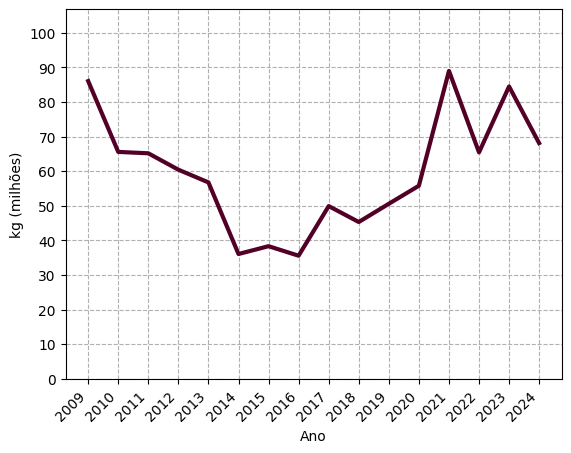

In [51]:
fig, ax = plt.subplots()
df = df_exports_total_by_year
plt.plot('ano', 'kg', data=df, label=None, linewidth=line_width)
max = df_exports_total_by_year.max()['kg']
my.set_y_lim(df, 'kg')
my.set_labels('Ano', 'kg (milhões)')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,10,0,'y')
my.rotate_label()

my.add_grid(ax)

#### Por categoria

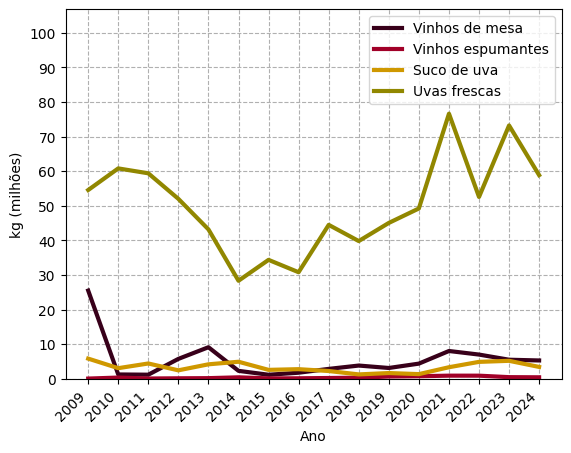

In [22]:
fig, ax = plt.subplots()

for kind in export_type:
    filter = df_exports_by_year_by_type['tipo'] == kind
    df = df_exports_by_year_by_type.loc[filter]
    plt.plot('ano', 'kg', data=df, color=type_color[kind], label=kind, linewidth=line_width)
my.add_grid(ax)
plt.legend()

my.set_labels('Ano', 'kg (milhões)')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,10,0,'y')
my.rotate_label()
my.set_y_lim(df_exports_million.groupby('ano').sum(numeric_only=True).reset_index(), 'kg')

#### Por país

In [23]:
# top5_weight_by_country = df_exports_by_country.sort_values('kg',ascending=False).head(5).reset_index()['pais_destino']
top10_weight_by_country = my.get_top(df_exports_by_country, 'kg', 'pais_destino', 5)
top10_weight_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Paraguai
Name: pais_destino, dtype: object

Text(0.5, 1.0, 'Exportações TOTAIS por PESO')

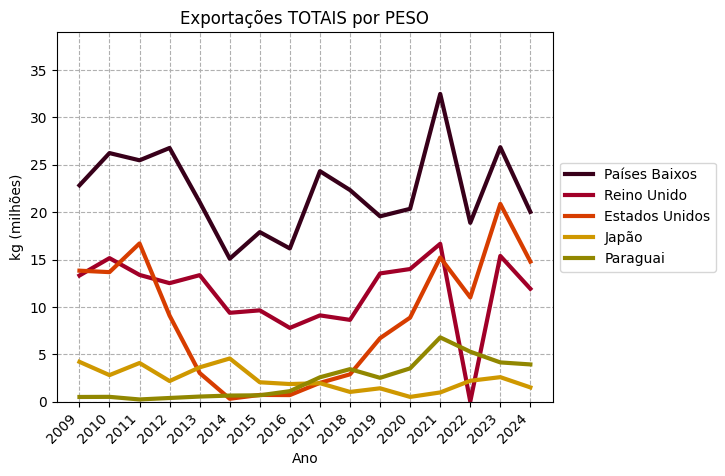

In [24]:
fig, ax = plt.subplots()

my.set_axes_cycler(cycler_rotation)

for country in top10_weight_by_country:
    df = df_exports_by_country_by_year.loc[df_exports_by_country_by_year['pais_destino'] == country]
    plt.plot('ano','kg', data=df, label=country, linewidth=line_width)
my.move_legend()

my.rotate_label()
my.set_y_lim(df_exports_by_country_by_year, 'kg')
my.set_labels('Ano','kg (milhões)')
my.ticks_on_years(ax)
my.add_grid(ax)
plt.title('Exportações TOTAIS por PESO')

#### Top 10 países por categoria 

In [25]:
def make_line_graph_of_type(type):
    filter = df_exports_by_type_by_country_by_year['tipo'] == type
    df_type = df_exports_by_type_by_country_by_year.loc[filter]
    df_exports_by_type_top5 = my.get_top(
        df_exports_by_country_by_type_ri.loc[
            df_exports_by_country_by_type_ri['tipo'] == type],
        'kg', 'pais_destino',6)
    fig, ax = plt.subplots()

    my.set_axes_cycler(cycler_rotation)

    for country in df_exports_by_type_top5:
        df = df_type.loc[df_type['pais_destino'] == country]
        plt.plot('ano','kg', data=df, label=country, linewidth=line_width)

    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    my.rotate_label()

    my.set_y_lim(df_type, 'kg')
    plt.title(f'Exportações TOTAIS de {type.lower()} por PESO')
    my.set_labels('Ano','kg (milhões)')
    my.ticks_on_years(ax)
    my.add_grid(ax)

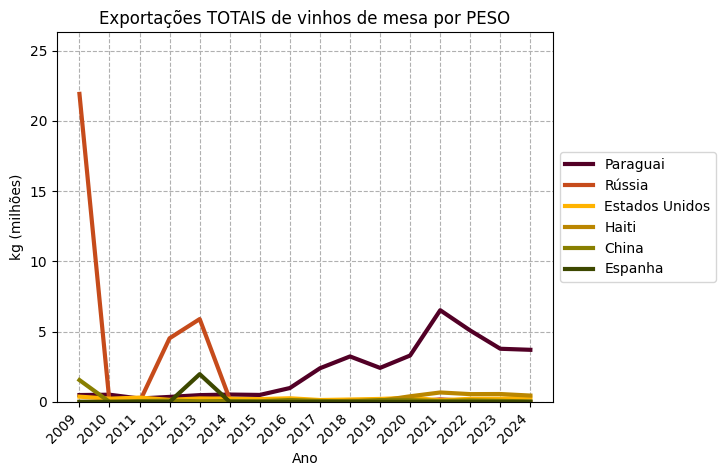

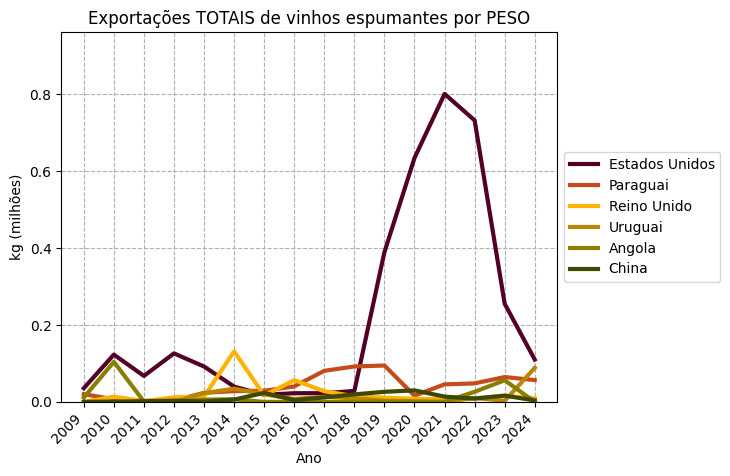

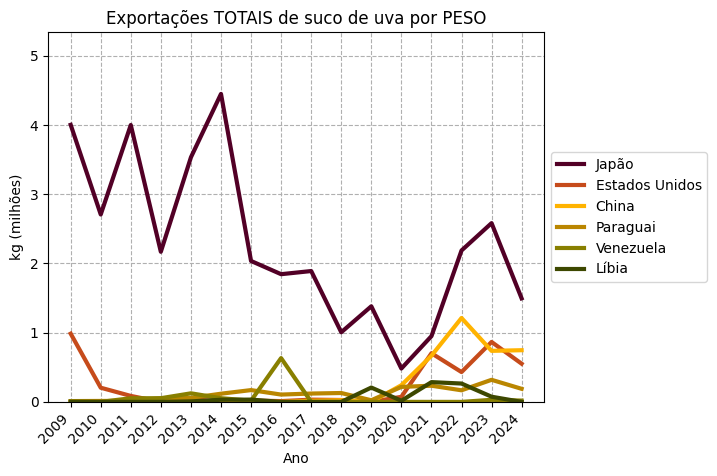

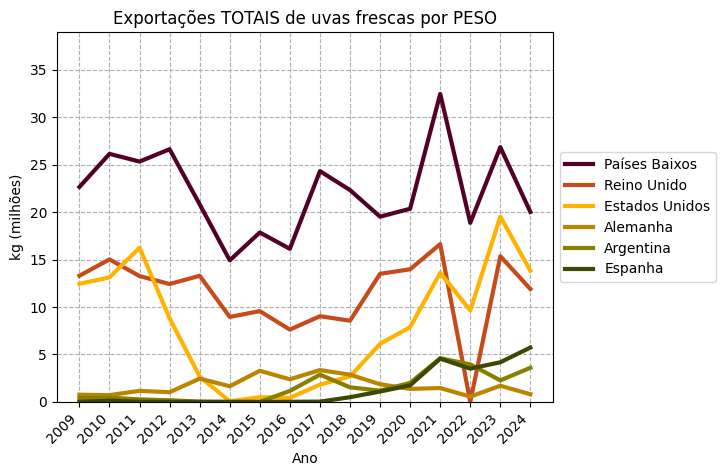

In [26]:
for type in type_color_name.keys():
    make_line_graph_of_type(type)

### Qual país mais comprou nos últimos 15 anos, por volume total?

In [27]:
top10_weight_by_country = my.get_top(df_exports_by_country,'kg',
                                    'pais_destino',10)
top10_weight_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Paraguai
5            Rússia
6          Alemanha
7         Argentina
8           Espanha
9           Romênia
Name: pais_destino, dtype: object

In [28]:
media = df_exports_by_country['kg'].mean()
media_top10 = df_exports_by_country.sort_values('kg',ascending=False)['kg'].head(10).mean()
media, media_top10

(np.float64(5.1769377934782606), np.float64(88.05479290000001))

In [29]:
def make_bar_graph(df : pd.DataFrame, xlabel : str, ylabel : str, xtick_rotation : int = 45, stacked : bool = False, color_dict : dict = type_color):
    axis = df.plot(kind='bar',
                   stacked = stacked,
                   color = [color_dict.get(x, '#333333') for x in df.columns])
    
    plt.xlabel('País')
    plt.ylabel('kg (milhões)')
    plt.xticks(rotation=45, ha='right')

    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)

    return axis

In [30]:
df = df_exports_million.loc[df_exports['pais_destino'].isin(top10_weight_by_country)].groupby(['pais_destino','tipo']).sum(True)
df.head()

categoria         kg      valor  valor_por_kg
pais_destino tipo                                                            
Alemanha     Suco de uva              0.0   0.038742   0.023523     16.437066
             Uvas frescas             0.0  27.419658  56.933674     33.609343
             Vinhos de mesa           0.0   0.654781   2.196372     78.890158
             Vinhos espumantes        0.0   0.073326   0.352395     84.721086
Argentina    Suco de uva              0.0   0.044001   0.250348     82.353706

In [31]:
df = df.reindex(top10_weight_by_country,level=0) # reorders them

In [32]:
df = df['kg'].unstack().reset_index()
df.head()

tipo,pais_destino,Suco de uva,Uvas frescas,Vinhos de mesa,Vinhos espumantes
0,Países Baixos,0.212593,355.299971,0.901060,0.030701
1,Reino Unido,0.044994,182.420812,1.165560,0.349253
2,Estados Unidos,4.041101,129.403203,3.659709,3.498767
3,Japão,36.726935,0.003343,1.001661,0.143430
4,Paraguai,1.943596,0.006782,34.508515,0.652864


In [33]:
df.columns[1:]

Index(['Suco de uva', 'Uvas frescas', 'Vinhos de mesa', 'Vinhos espumantes'], dtype='object', name='tipo')

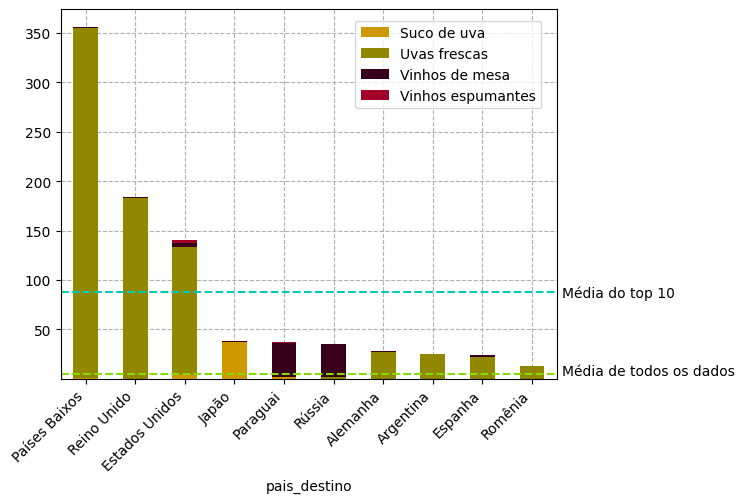

In [34]:
ax = df.plot(kind='bar',x='pais_destino',stacked=True, color = [type_color.get(x, '#333333') for x in df.columns[1:]])

ax.axhline(media, c=colors_accent[0],ls='--')
ax.axhline(media_top10, c=colors_accent[1], ls='--')
ax.legend(loc='center left', bbox_to_anchor=(0.58,  0.85))
my.rotate_label()
ax.text(ax.get_xlim()[1]+0.1, media_top10 - 5,'Média do top 10')
ax.text(ax.get_xlim()[1]+0.1, media - 2,'Média de todos os dados')
my.add_grid(ax)

In [35]:
# df_exports_by_country_top5_categories_unstack = df.reindex(index=top5_weight_by_country,level=0).unstack()
# axis = make_bar_graph(df_exports_by_country_top5_categories_unstack, 'País', 'kg (milhões)', stacked=True)

### Por categoria

In [36]:
def make_bar_graph_category (type : str):
    filtro = df_exports_by_country_by_type_ri['tipo'] == type
    df = df_exports_by_country_by_type_ri.loc[filtro][['pais_destino','tipo','kg']].sort_values('kg',ascending=False)
    axis = df.head(10).plot(kind='bar', x='pais_destino', y='kg', color=type_color[type])
    axis.legend([type])
    plt.xlabel('País')
    plt.ylabel('kg (milhões)')
    plt.xticks(rotation=45, ha='right')
    my.add_grid(axis)
    my.set_y_lim(df, 'kg', 0.1)
    my.rotate_label(25, 'right')
    axis.set_ylim(0,axis.get_ylim()[1]*1.2)
    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)
    return axis

<Axes: xlabel='País', ylabel='kg (milhões)'>

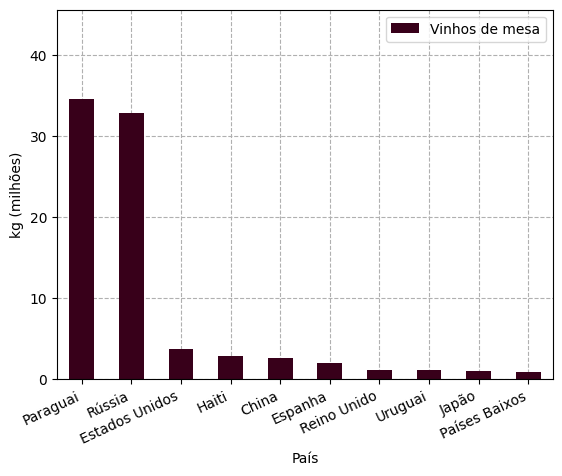

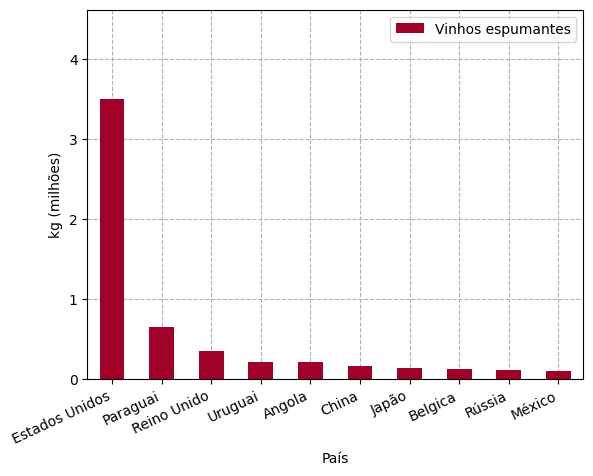

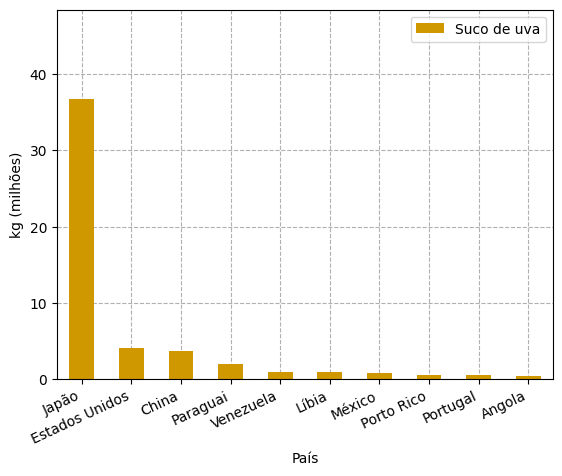

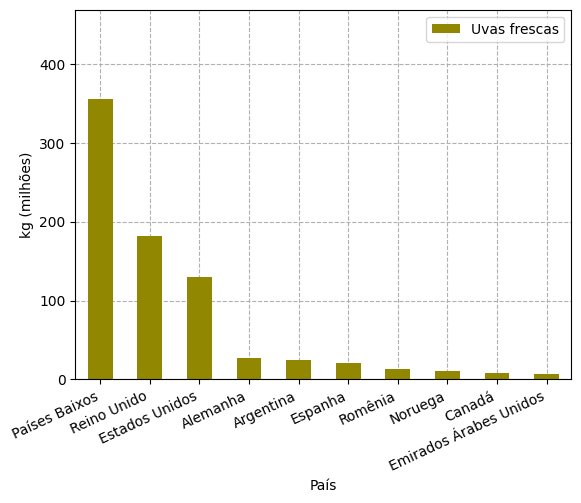

In [37]:
type = 'Vinhos de mesa'
make_bar_graph_category(type)
type = 'Vinhos espumantes'
make_bar_graph_category(type)
type = 'Suco de uva'
make_bar_graph_category(type)
type = 'Uvas frescas'
make_bar_graph_category(type)

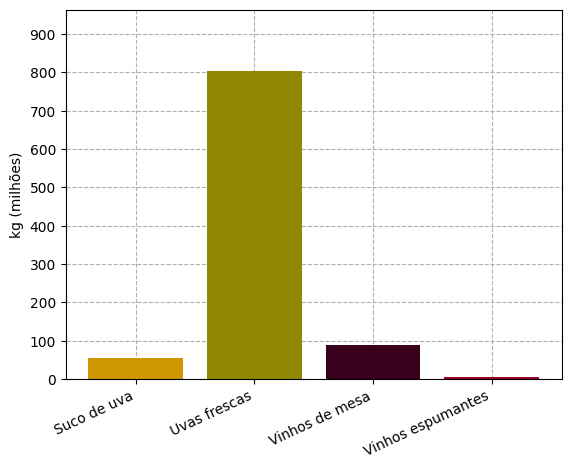

In [38]:
df = df_exports_by_type

fig, ax = plt.subplots()

plt.bar('tipo', 'kg',data=df, color = [type_color.get(x, '#333333') for x in df['tipo']])

my.set_labels(y='kg (milhões)')
my.ticks_per_interval(ax, 100, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'kg')
my.rotate_label(25, 'right')

### Conclusões
- Por PESO TOTAL, nos ÚLTIMOS 15 ANOS, quem mais comprou foram os PAÍSES BAIXOS

## Qual país trouxe MAIS DINHEIRO, no total?

In [39]:
df_exports_by_country_total_sort_by_value = df_exports_by_country.sort_values('valor',ascending=False)
df_exports_by_country_total_sort_by_value.head(20)

,pais_destino,categoria,kg,valor,valor_por_kg
137,Países Baixos,0.0,356.444325,753.357290,2.113534
146,Reino Unido,0.0,183.980619,431.261744,2.344061
63,Estados Unidos,0.0,140.602780,359.175130,2.554538
97,Japão,0.0,37.875369,100.170258,2.644734
2,Alemanha,0.0,28.186507,59.505964,2.111151
136,Paraguai,0.0,37.111757,52.449043,1.413273
9,Argentina,0.0,24.651966,50.480786,2.047739
62,Espanha,0.0,23.577630,43.825182,1.858761
128,Noruega,0.0,10.997250,30.558272,2.778719
151,Romênia,0.0,13.194830,28.569808,2.165227


In [40]:
top10_value_by_country = my.get_top(df_exports_by_country_total_sort_by_value,'valor','pais_destino',10)
top10_value_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Alemanha
5          Paraguai
6         Argentina
7           Espanha
8           Noruega
9           Romênia
Name: pais_destino, dtype: object

In [41]:
df = df_exports_by_country_by_type['valor'].unstack().reset_index()
df = df.loc[df['pais_destino'].isin(top10_value_by_country)]
df['pais_destino'] = pd.Categorical(df.pais_destino, top10_value_by_country, ordered=True)
df = df.sort_values('pais_destino')
df

tipo,pais_destino,Suco de uva,Uvas frescas,Vinhos de mesa,Vinhos espumantes
137,Países Baixos,0.542202,749.619273,3.035719,0.160096
146,Reino Unido,0.091936,424.769475,4.747648,1.652685
63,Estados Unidos,8.621653,330.412322,9.957775,10.183380
97,Japão,97.279630,0.010816,2.324119,0.555693
2,Alemanha,0.023523,56.933674,2.196372,0.352395
136,Paraguai,2.581019,0.008225,47.984063,1.875736
9,Argentina,0.250348,49.621718,0.425513,0.183207
62,Espanha,0.053310,39.858516,3.807951,0.105405
128,Noruega,0.011071,30.096182,0.268880,0.182139
151,Romênia,NaN,28.569808,NaN,NaN


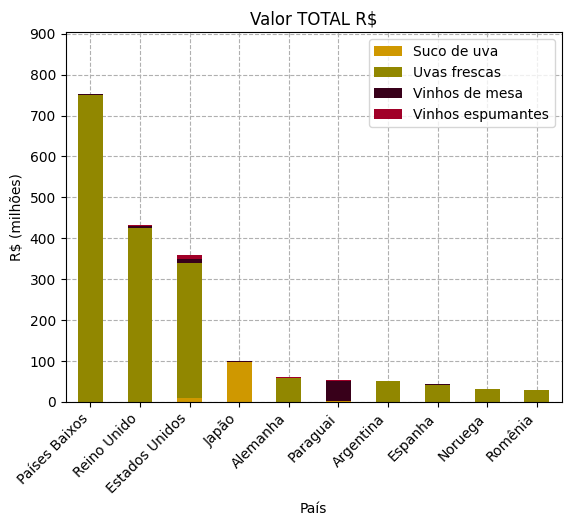

In [42]:
ax = df.plot(kind='bar', x='pais_destino', stacked=True,
               color = [type_color.get(x, '#333333') for x in df.columns[1:]])

# for kind in export_type:
#     df = df_exports_total_by_year_by_type.loc[kind].reset_index()
#     plt.plot('ano', 'kg', data=df, color=type_color[kind], label=kind)
my.add_grid(ax)
plt.legend()

my.set_labels('País', 'R$ (milhões)')
my.rotate_label()
my.set_y_lim(df_exports_by_country, 'valor')
my.ticks_per_interval(ax, 100,0,'y')

plt.title('Valor TOTAL R$');

### Linha do tempo

## Qual PRODUTO touxe mais dinheiro?

In [43]:
top10_value_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Alemanha
5          Paraguai
6         Argentina
7           Espanha
8           Noruega
9           Romênia
Name: pais_destino, dtype: object

Text(0.5, 1.0, 'R$ por país')

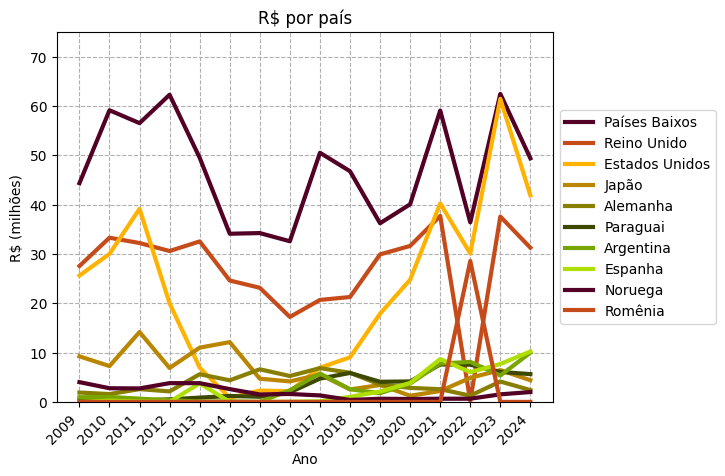

In [44]:
fig, ax = plt.subplots()

my.set_axes_cycler(cycler_rotation)

for country in top10_value_by_country:
    df = df_exports_by_country_by_year.loc[df_exports_by_country_by_year['pais_destino'] == country]
    plt.plot('ano','valor', data=df, label=country, linewidth=line_width)
my.move_legend()

my.rotate_label()
my.set_y_lim(df_exports_by_country_by_year, 'valor')
my.set_labels('Ano','R$ (milhões)')
my.ticks_on_years(ax)
my.add_grid(ax)
plt.title('R$ por país')

### Linha do tempo

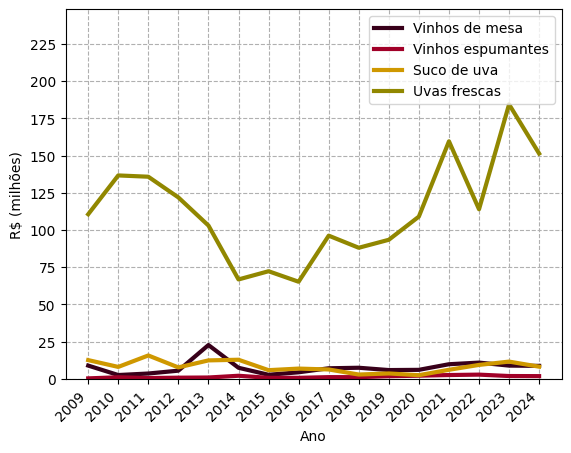

In [45]:
fig, ax = plt.subplots()

for kind in export_type:
    filter = df_exports_by_year_by_type['tipo'] == kind
    df = df_exports_by_year_by_type.loc[filter]
    plt.plot('ano', 'valor', data=df, color=type_color[kind], label=kind, linewidth=line_width)
my.add_grid(ax)
plt.legend()

my.set_labels('Ano', 'R$ (milhões)')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,25,0,'y')
my.rotate_label()
my.set_y_lim(df_exports_million.groupby('ano').sum(numeric_only=True).reset_index(), 'valor')

### No TOTAL

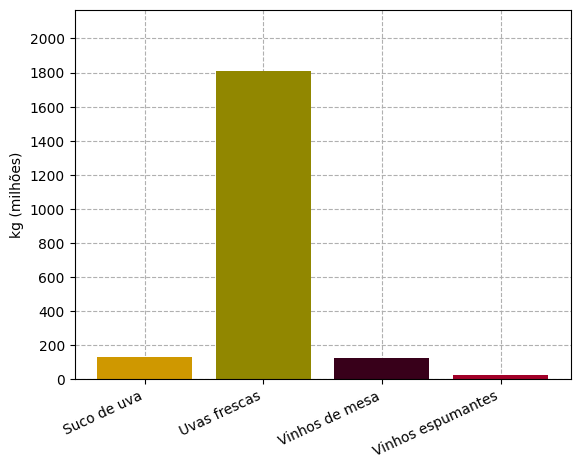

In [46]:
df = df_exports_by_type

fig, ax = plt.subplots()

plt.bar('tipo', 'valor',data=df, color = [type_color.get(x, '#333333') for x in df['tipo']])

my.set_labels(y='kg (milhões)')
my.ticks_per_interval(ax, 200, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'valor')
my.rotate_label(25, 'right')

## Qual produto trouxe MAIS DINHEIRO POR KG?

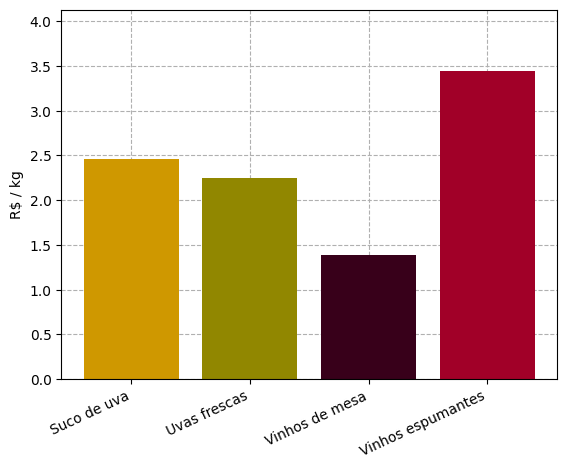

In [47]:
df = df_exports_by_type

fig, ax = plt.subplots()

plt.bar('tipo', 'valor_por_kg',data=df, color = [type_color.get(x, '#333333') for x in df['tipo']])

my.set_labels(y='R$ / kg')
my.ticks_per_interval(ax, 0.5, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'valor_por_kg')
my.rotate_label(25, 'right')

## Qual a linha do tempo dos PAÍSES EM MAIOR DESTAQUE?

## Há relação entre os dados e o CONTINENTE a qual estamos exportando?